In [1]:

from datetime import datetime
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 


In [2]:
today_date=datetime.now()
#filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-26.xlsx"
df=pd.read_excel(filename)

In [3]:
#Filter the results to just get UK
df_uk_1=df.loc[df["GeoId"]=='UK']

In [4]:
#sort by date and then get a cumulative total of confirmed cases
df_uk_C = df_uk_1.sort_values('DateRep')
df_uk_C['UK_Total_Cases'] = df_uk_C['Cases'].cumsum()

#remove the empty head on 0 cumulative cases
indexNames = df_uk_C[ df_uk_C['UK_Total_Cases'] == 0 ].index
df_uk_C.drop(indexNames, inplace=True)

#remove the cases without recognised cases.  there seem to be a gap at the beginning.  
indexNamesC = df_uk_C[ df_uk_C['Cases'] == 0 ].index
df_uk_C.drop(indexNamesC, inplace=True)

# Reset index
df_uk_C = df_uk_C.reset_index(drop=True)

df_uk_C.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018,UK_Total_Cases
29,2020-03-22,22,3,2020,1035,56,United_Kingdom,UK,GBR,66488991.0,5018
30,2020-03-23,23,3,2020,665,48,United_Kingdom,UK,GBR,66488991.0,5683
31,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,GBR,66488991.0,6650
32,2020-03-25,25,3,2020,1427,87,United_Kingdom,UK,GBR,66488991.0,8077
33,2020-03-26,26,3,2020,1452,0,United_Kingdom,UK,GBR,66488991.0,9529


In [5]:
#sort by date and then get a cumulative total of confirmed deaths
df_uk_D = df_uk_1.sort_values('DateRep')
df_uk_D['UK_Total_Deaths'] = df_uk_D['Deaths'].cumsum()

#remove the empty head on 0 cumulative deaths
indexNamesD = df_uk_D[ df_uk_D['UK_Total_Deaths'] == 0 ].index
df_uk_D.drop(indexNamesD, inplace=True)

# Reset index
df_uk_D = df_uk_D.reset_index(drop=True)

df_uk_D.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018,UK_Total_Deaths
16,2020-03-22,22,3,2020,1035,56,United_Kingdom,UK,GBR,66488991.0,233
17,2020-03-23,23,3,2020,665,48,United_Kingdom,UK,GBR,66488991.0,281
18,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,GBR,66488991.0,335
19,2020-03-25,25,3,2020,1427,87,United_Kingdom,UK,GBR,66488991.0,422
20,2020-03-26,26,3,2020,1452,0,United_Kingdom,UK,GBR,66488991.0,422


In [6]:
#Do the same for Italy
df_it_1=df.loc[df["GeoId"]=='IT']

In [7]:
df_it_C = df_it_1.sort_values('DateRep')
df_it_C['IT_Total_Cases'] = df_it_C['Cases'].cumsum()

indexNamesIT = df_it_C[ df_it_C['IT_Total_Cases'] == 0 ].index
df_it_C.drop(indexNamesIT, inplace=True)

indexNamesITC = df_it_C[ df_it_C['Cases'] == 0 ].index
df_it_C.drop(indexNamesITC, inplace=True)

df_it_C = df_it_C.reset_index(drop=True)

df_it_C.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018,IT_Total_Cases
30,2020-03-22,22,3,2020,6557,795,Italy,IT,ITA,60431283.0,53578
31,2020-03-23,23,3,2020,5560,649,Italy,IT,ITA,60431283.0,59138
32,2020-03-24,24,3,2020,4789,601,Italy,IT,ITA,60431283.0,63927
33,2020-03-25,25,3,2020,5249,743,Italy,IT,ITA,60431283.0,69176
34,2020-03-26,26,3,2020,5210,685,Italy,IT,ITA,60431283.0,74386


In [8]:
df_it_D = df_it_1.sort_values('DateRep')
df_it_D['IT_Total_Deaths'] = df_it_D['Deaths'].cumsum()

indexNamesITD = df_it_D[ df_it_D['IT_Total_Deaths'] == 0 ].index
df_it_D.drop(indexNamesITD, inplace=True)

df_it_D = df_it_D.reset_index(drop=True)

df_it_D.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018,IT_Total_Deaths
28,2020-03-22,22,3,2020,6557,795,Italy,IT,ITA,60431283.0,4827
29,2020-03-23,23,3,2020,5560,649,Italy,IT,ITA,60431283.0,5476
30,2020-03-24,24,3,2020,4789,601,Italy,IT,ITA,60431283.0,6077
31,2020-03-25,25,3,2020,5249,743,Italy,IT,ITA,60431283.0,6820
32,2020-03-26,26,3,2020,5210,685,Italy,IT,ITA,60431283.0,7505


In [9]:
#Add the IT cases to the UK pd. sync up index
it_total_cases = df_it_C['IT_Total_Cases']
pd_case = df_uk_C.join(it_total_cases)


In [10]:
#Add the IT deaths to the UK pd. sync up index
it_total_deaths = df_it_D['IT_Total_Deaths']
pd_death = df_uk_D.join(it_total_deaths)


In [11]:
#find max values for both cases and deaths
uk_maxC = pd_case.max()
uk_maxD = pd_death.max()

In [12]:
#work out the uk % of cases and deaths compared to Italy.  
print ("UK case percentage: ", uk_maxC['UK_Total_Cases']/uk_maxC['IT_Total_Cases'])
print ("UK death percentage: ", uk_maxD['UK_Total_Deaths']/uk_maxD['IT_Total_Deaths'])
print (uk_maxC)
print (uk_maxD)

UK case percentage:  0.1377500867352839
UK death percentage:  0.33280757097791797
DateRep                      2020-03-26 00:00:00
Day                                           31
Month                                          3
Year                                        2020
Cases                                       1452
Deaths                                        87
Countries and territories         United_Kingdom
GeoId                                         UK
Country Code                                 GBR
Pop_Data.2018                         6.6489e+07
UK_Total_Cases                              9529
IT_Total_Cases                             69176
dtype: object
DateRep                      2020-03-26 00:00:00
Day                                           26
Month                                          3
Year                                        2020
Cases                                       1452
Deaths                                        87
Countries and territor

In [13]:
import datetime
datefortoday=datetime.date.today()
dateforyesterday=datefortoday-datetime.timedelta(days = 1)
print (dateforyesterday)

2020-03-25


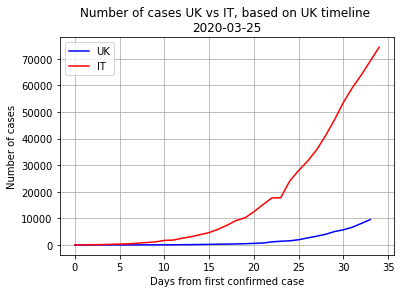

In [14]:
x_uk = df_uk_C.index
y_uk = df_uk_C['UK_Total_Cases']
x_it = df_it_C.index
y_it = df_it_C['IT_Total_Cases']

plt.title('Number of cases UK vs IT, based on UK timeline \n' +str(dateforyesterday))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Number of cases')
plt.grid(True)

uk_plot= plt.plot(x_uk,y_uk, color='blue', label='UK')
it_plot= plt.plot(x_it,y_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_Cases_UK_baseline" +str(dateforyesterday)+ ".pdf")

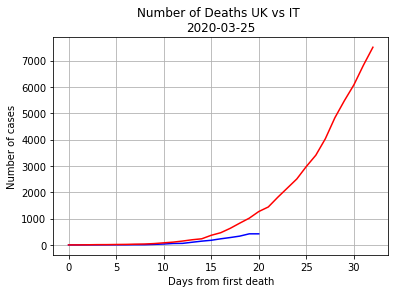

In [15]:
x_ukD = df_uk_D.index
y_ukD = df_uk_D['UK_Total_Deaths']
x_itD = df_it_D.index
y_itD = df_it_D['IT_Total_Deaths']

plt.title('Number of Deaths UK vs IT \n' +str(dateforyesterday))
plt.xlabel('Days from first death')
plt.ylabel('Number of cases')
plt.grid(True)

plt.plot(x_ukD,y_ukD, color='blue', label='UK')
plt.plot(x_itD,y_itD, color='red', label='IT')

plt.savefig("UKvsIT_Deaths" +str(dateforyesterday)+ ".pdf")

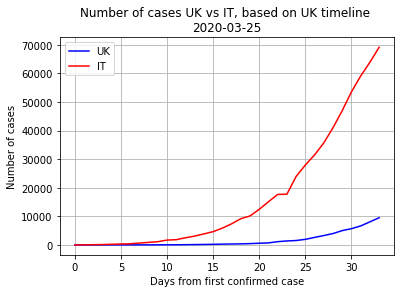

In [16]:
x = pd_case.index
y_uk = pd_case['UK_Total_Cases']
y_it = pd_case['IT_Total_Cases']

plt.title('Number of cases UK vs IT, based on UK timeline \n'  +str(dateforyesterday))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Number of cases')
plt.grid(True)

uk_plotC= plt.plot(x,y_uk, color='blue', label='UK')
it_plotC= plt.plot(x,y_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_Deaths_UK_baseline" +str(dateforyesterday)+ ".pdf")

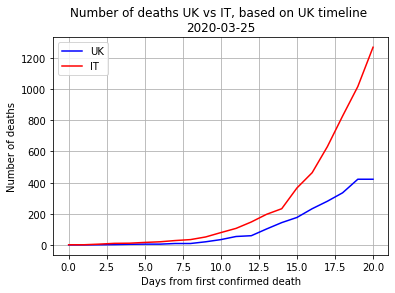

In [17]:
xd = pd_death.index
yd_uk = pd_death['UK_Total_Deaths']
yd_it = pd_death['IT_Total_Deaths']

plt.title('Number of deaths UK vs IT, based on UK timeline \n'  +str(dateforyesterday))
plt.xlabel('Days from first confirmed death')
plt.ylabel('Number of deaths')
plt.grid(True)

uk_plotD= plt.plot(xd,yd_uk, color='blue', label='UK')
it_plotD= plt.plot(xd,yd_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_Death_UK_baseline"  +str(dateforyesterday)+ ".pdf")


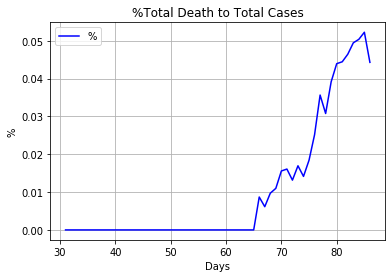

In [18]:
df_uk_P = df_uk_1.sort_values('DateRep')
df_uk_P['UK_Total_Cases'] = df_uk_P['Cases'].cumsum()
df_uk_P['UK_Total_Deaths'] = df_uk_P['Deaths'].cumsum()
df_uk_P['UK_Death_Percentage']=df_uk_P['UK_Total_Deaths']/df_uk_P['UK_Total_Cases'] 

df_uk_P = df_uk_P.reset_index(drop=True)


x = df_uk_P.index
y = df_uk_P['UK_Death_Percentage']

plt.title('%Total Death to Total Cases')
plt.xlabel('Days')
plt.ylabel('%')
plt.grid(True)

uk_plotD= plt.plot(x,y, color='blue', label='%')
plt.legend()